# Poker Hand Data Set 
Source: https://archive.ics.uci.edu/ml/datasets/Poker+Hand

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [17]:
plt.style.use('ggplot')

In [87]:
train = np.loadtxt('poker-hand-training-true.data', delimiter=',', dtype=int)
train_x = train[:,:10]
train_y = train[:,10]

test = np.loadtxt('poker-hand-testing.data', delimiter=',', dtype=int)
test_x = test[:,:10]
test_y = test[:,10]

In [21]:
# S = Suit of card #
# C = Rank of card #
attribute_names = ("S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5")
class_names = ("Nothing", "One pair", "Two pairs", "Three of a kind", "Straight", "Flush", "Full house", "Four of a kind", "Straight flush", "Royal flush")

In [28]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(25010, 10)
(25010,)
(1000000, 10)
(1000000,)


(array([1.2493e+04, 1.0599e+04, 1.2060e+03, 5.1300e+02, 9.3000e+01,
        5.4000e+01, 3.6000e+01, 6.0000e+00, 5.0000e+00, 5.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

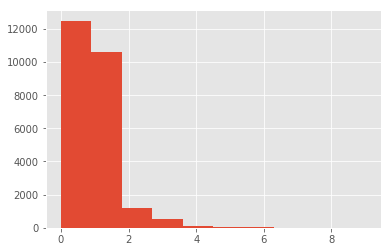

In [88]:
plt.hist(train_y)

(array([5.01209e+05, 4.22498e+05, 4.76220e+04, 2.11210e+04, 3.88500e+03,
        1.99600e+03, 1.42400e+03, 2.30000e+02, 1.20000e+01, 3.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

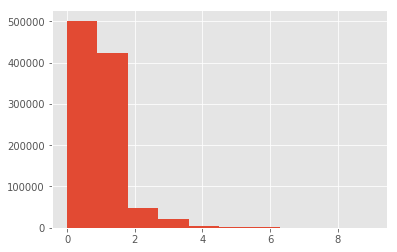

In [89]:
plt.hist(test_y)

In [156]:
# preprocessing

In [225]:
# prepare mdoel
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=train_x.shape[1:], activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 256)               2816      
_________________________________________________________________
dense_101 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_102 (Dense)            (None, 10)                2570      
Total params: 71,178
Trainable params: 71,178
Non-trainable params: 0
_________________________________________________________________


In [226]:
# compile model
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [227]:
# evaluate accuracy
model.fit(train_x, train_y, epochs=75)

Epoch 1/75
25010/25010 [==============================] - 5s 199us/step - loss: 1.0079 - acc: 0.5089
Epoch 2/75
25010/25010 [==============================] - 4s 175us/step - loss: 0.9609 - acc: 0.5393
Epoch 3/75
25010/25010 [==============================] - 5s 193us/step - loss: 0.9510 - acc: 0.5471
Epoch 4/75
25010/25010 [==============================] - 5s 191us/step - loss: 0.9406 - acc: 0.5573
Epoch 5/75
25010/25010 [==============================] - 5s 185us/step - loss: 0.9317 - acc: 0.5627
Epoch 6/75
25010/25010 [==============================] - 4s 178us/step - loss: 0.9213 - acc: 0.5682
Epoch 7/75
25010/25010 [==============================] - 4s 178us/step - loss: 0.9098 - acc: 0.5737
Epoch 8/75
25010/25010 [==============================] - 4s 175us/step - loss: 0.8950 - acc: 0.5862
Epoch 9/75
25010/25010 [==============================] - 5s 186us/step - loss: 0.8781 - acc: 0.5974
Epoch 10/75
25010/25010 [==============================] - 5s 188us/step - loss: 0.8535 - a

In [228]:
n = 1000
test_loss, test_acc = model.evaluate(test_x[:n], test_y[:n])
print('Test accuracy: {}'.format(test_acc))

1000/1000 [==============================] - 0s 435us/step
Test accuracy: 0.978


In [229]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy: {}'.format(test_acc))

1000000/1000000 [==============================] - 93s 93us/step
Test accuracy: 0.977016


In [230]:
predictions = model.predict(test_x[:1000])

In [238]:
def plot_predictions(i, predictions, labels):
    plot = plt.bar(range(len(class_names)), predictions[0], color="black")
    plt.ylim([0, 1])
    
    correct_label = labels[i]
    predicted_label = np.argmax(predictions[i])
    plot[predicted_label].set_color('red')
    plot[correct_label].set_color('green')

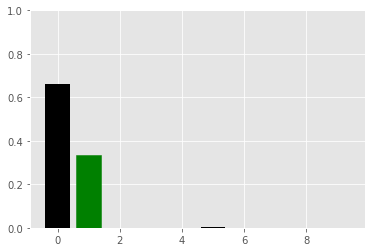

In [252]:
plot_predictions(1, predictions, test_y)